In [1]:
# Copyright 2026 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to Gemini 3

| Adapted from **Intro to Gemini** by:|
| --- |
| [Eric Dong](https://github.com/gericdong) |
| [Holt Skinner](https://github.com/holtskinner) |

## Overview

Gemini 3 is Google's latest flagship model family, trained to be especially proficient in:

* Advanced reasoning and complex instruction following  
* Agentic operations and autonomous code execution  
* Multimodal understanding across long contexts (text, image, audio, video)

This notebook serves as a quickstart guide for developers to begin interacting with the **Gemini 3 Pro** and **Gemini 3 Flash** models via the Google Gen AI SDK on Vertex AI. It is designed to demonstrate key model capabilities and showcase the API features.

## Get started

In this section, you install and prepare your environment. When instructed, return to the lab instructions to check your progress and confirm your progress.

### Install Google Gen AI SDK for Python

Gemini 3 API features and Flash require Gen AI SDK for Python version 1.51.0 or later.

In [2]:
%pip install --upgrade --quiet google-genai>=1.56.0

Note: you may need to restart the kernel to use updated packages.


### Import libraries


In [3]:
import os
import sys

from IPython.display import HTML, Markdown, display
from google import genai
from google.genai import types
from pydantic import BaseModel

### Authenticate your Google Cloud Project for Vertex AI

You can use a Google Cloud Project or an API Key for authentication. This lab uses your Google Cloud Project.

- Enable the Vertex AI API by running the code below.

In [4]:
import os
PROJECT_ID = "qwiklabs-gcp-04-e9b303265b67"
LOCATION = "global"
client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

Return to the lab instructions to **Check your progress**. This confirms you've installed the required packages and imported the required libraries.

## Load the Gemini models

You use the `gemini-3-pro-preview` and `gemini-3-flash-preview` models in this lab. Learn more about all [Gemini models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models).

In [5]:
# Define both model IDs for use throughout the lab
PRO_MODEL_ID = "gemini-3-pro-preview"
FLASH_MODEL_ID = "gemini-3-flash-preview"

# Default to Pro for the main walkthrough
MODEL_ID = PRO_MODEL_ID


Return to the lab instructions to **Check your progress** to verify you've successfully set the chosen models.

## Explore Gemini 3 Pro

In this section, you explore key Gemini 3 Pro model capabilities and API features. When instructed, return to the lab instructions to check your progress and confirm your progress.

### ✅ Set system instructions

You can guide the behavior of Gemini models with system instructions. To do so, pass a `GenerateContentConfig` object.

In [6]:
system_instruction = """
  You are a helpful language translator.
  Your mission is to translate text in English to Spanish.
"""

prompt = """
  User input: I like bagels.
  Answer:
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        system_instruction=system_instruction,
    ),
)

display(Markdown(response.text))

Me gustan los bagels.

Return to the lab instructions to **Check your progress** to verify you ran the **Set the system instructions** section.

### ✅ Thinking level

The `thinking_level` parameter allows you to control the cost of the model's response generation. By selecting a state, you can explicitly balance the trade-offs between response quality/reasoning complexity and latency/cost.

- **Minimum** (Flash only): Uses as few tokens as possible. Requires thought signatures; best used for low-complexity tasks that wouldn't benefit from extensive reasoning.
- **Low**: Minimizes latency and cost. Best for simple instruction following or chat.
- **Medium** (Flash only): Suitable for tasks of moderate complexity that benefit from reasoning but don't require deep, multi-step planning.
- **High**: Maximizes reasoning depth. The model may take significantly longer to reach a first token, but the output will be more thoroughly vetted.


#### ⚠️ Notes

- If `thinking_level` is not specified, the model defaults to `high`, which is a dynamic setting that adjusts based on prompt complexity.
- You cannot use both `thinking_level` and the legacy `thinking_budget` parameter in the same request. Doing so will return a 400 error.
- The OpenAI Chat Completions API `reasoning_effort` `medium` maps to `thinking_level` `high`.
- Thinking can't be turned off for Gemini 3 Pro.

In [7]:
prompt = """
You are tasked with implementing the classic Thread-Safe Double-Checked Locking (DCL) Singleton pattern in modern C++. This task is non-trivial and requires specialized concurrency knowledge to prevent memory reordering issues.

Write a complete, runnable C++ program named `dcl_singleton.cpp` that defines a class `Singleton` with a private constructor and a static `getInstance()` method.

Your solution MUST adhere to the following strict constraints:
1. The Singleton instance pointer (`static Singleton*`) must be wrapped in `std::atomic` to correctly manage memory visibility across threads.
2. The `getInstance()` method must use `std::memory_order_acquire` when reading the instance pointer in the outer check.
3. The instance creation and write-back must use `std::memory_order_release` when writing to the atomic pointer.
4. A standard `std::mutex` must be used only to protect the critical section (the actual instantiation).
5. The `main` function must demonstrate safe, concurrent access by launching at least three threads, each calling `Singleton::getInstance()`, and printing the address of the returned instance to prove all threads received the same object.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_level=types.ThinkingLevel.HIGH  # Dynamic thinking for high reasoning tasks
        )
    ),
)

display(Markdown(response.text))

Here is the complete, runnable C++ program `dcl_singleton.cpp` that implements the Thread-Safe Double-Checked Locking Singleton pattern using C++11 atomics and memory ordering.

```cpp
/**
 * dcl_singleton.cpp
 *
 * Implements the Double-Checked Locking (DCL) Singleton pattern using
 * C++ std::atomic and explicit memory ordering constraints.
 *
 * EXPLANATION OF CONCURRENCY SAFETY:
 * 1. std::atomic<Singleton*>: Ensures read/write operations on the pointer are atomic.
 *
 * 2. Outer Check (std::memory_order_acquire):
 *    If thread A sees a non-null pointer, the 'acquire' semantics ensure that
 *    all writes performed by the thread B that created the instance (specifically
 *    the construction of the object members) are visible to thread A. Without this,
 *    thread A might see a non-null pointer but access uninitialized memory of the object.
 *
 * 3. Write Back (std::memory_order_release):
 *    Ensures that the initialization of the Singleton object (executing the constructor)
 *    happens-before the pointer is stored in the atomic variable. This prevents the
 *    compiler or CPU from reordering the store of the pointer to occur before the
 *    object is fully constructed.
 *
 * 4. Inner Check (std::memory_order_relaxed):
 *    Inside the lock, we are guaranteed exclusive access. We load the pointer again
 *    to ensure no other thread initialized it while we were waiting for the lock.
 *    Relaxed is sufficient here because the mutex acquisition already establishes
 *    a memory barrier.
 */

#include <iostream>
#include <atomic>
#include <mutex>
#include <thread>
#include <vector>
#include <sstream> // For thread-safe output formatting

class Singleton {
public:
    // Static method to get the single instance
    static Singleton* getInstance();

    // Deleted copy constructor and assignment operator
    Singleton(const Singleton&) = delete;
    Singleton& operator=(const Singleton&) = delete;

private:
    // Private Constructor
    Singleton() {
        // Simulate some initialization work
        std::this_thread::sleep_for(std::chrono::milliseconds(100));
        std::cout << "[Singleton] Constructor executed. Object initialized." << std::endl;
    }

    // Constraint 1: Instance pointer wrapped in std::atomic
    static std::atomic<Singleton*> instance;
    
    // Constraint 4: Mutex for the critical section
    static std::mutex mtx;
};

// Static member definition
std::atomic<Singleton*> Singleton::instance{nullptr};
std::mutex Singleton::mtx;

Singleton* Singleton::getInstance() {
    // Constraint 2: Outer check using acquire
    Singleton* ptr = instance.load(std::memory_order_acquire);
    
    if (ptr == nullptr) {
        // Constraint 4: Lock mutex only if instance appears null
        std::lock_guard<std::mutex> lock(mtx);
        
        // Inner check: Verify again in case another thread initialized 
        // while we were waiting on the lock.
        // Relaxed ordering is sufficient here because the lock acquisition 
        // provides necessary synchronization.
        ptr = instance.load(std::memory_order_relaxed);
        
        if (ptr == nullptr) {
            // Actual object creation
            ptr = new Singleton();
            
            // Constraint 3: Write-back using release
            // This ensures the constructor finishes BEFORE the pointer becomes visible to other threads.
            instance.store(ptr, std::memory_order_release);
        }
    }
    return ptr;
}

// Function to be run by threads
void threadTask(int id) {
    // Artificial delay to scramble thread start times slightly
    std::this_thread::sleep_for(std::chrono::milliseconds(10));

    Singleton* s = Singleton::getInstance();

    // Print the address thread-safely
    std::stringstream ss;
    ss << "Thread " << id << " got Singleton instance at address: " << s << "\n";
    std::cout << ss.str();
}

int main() {
    std::cout << "Starting DCL Singleton Demo..." << std::endl;

    const int NUM_THREADS = 5;
    std::vector<std::thread> threads;

    // Constraint 5: Launch multiple threads calling getInstance()
    for (int i = 0; i < NUM_THREADS; ++i) {
        threads.emplace_back(threadTask, i + 1);
    }

    // Join threads
    for (auto& t : threads) {
        if (t.joinable()) {
            t.join();
        }
    }

    std::cout << "All threads finished." << std::endl;
    return 0;
}
```

### How to Compile and Run

You can compile this code using any modern C++ compiler (GCC, Clang, MSVC) that supports C++11 or later.

**Using g++:**
```bash
g++ -std=c++11 -pthread dcl_singleton.cpp -o dcl_singleton
./dcl_singleton
```

**Expected Output:**
You will see exactly one construction message, followed by all threads reporting the exact same memory address.

```text
Starting DCL Singleton Demo...
[Singleton] Constructor executed. Object initialized.
Thread 1 got Singleton instance at address: 0x...
Thread 2 got Singleton instance at address: 0x...
Thread 3 got Singleton instance at address: 0x...
...
All threads finished.
```

For faster, lower-latency responses when complex reasoning isn't required, you can constrain the model's thinking level by setting parameter `thinking_level` to `low`:

In [8]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="How does AI work?",
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_level=types.ThinkingLevel.LOW  # For faster and lower-latency responses
        )
    ),
)

display(Markdown(response.text))

At its core, Artificial Intelligence (AI) works by **combining large amounts of data with intelligent algorithms (sets of instructions) to learn patterns.**

Think of it like teaching a child to recognize a dog. You don’t explain the mathematical geometry of a dog's ear. Instead, you show the child thousands of pictures—some are dogs, some are cats, some are wolves—and you label them. Eventually, the child learns the specific patterns that make a "dog" a dog (snout shape, ear floppiness, fur texture).

AI works the same way, but much faster and with mathematical data. Here is the step-by-step breakdown of how it works:

### 1. It Starts with Data (The Fuel)
AI cannot function without data. This could be text (like all of Wikipedia), images, numbers, or audio.
*   **Input:** To teach an AI to translate English to Spanish, you feed it millions of documents that have already been translated.
*   **The goal:** The AI looks for statistical relationships between the data points.

### 2. Machine Learning (The Engine)
This is the process where the computer learns without being explicitly programmed for every single rule. Instead of coding "If the object has whiskers, it is a cat," the computer figures that rule out on its own.
*   **Training:** The AI makes a guess, gets corrected, adjusts its internal math, and guesses again. It does this millions of times until the error rate is very low.

### 3. Neural Networks (The Brain)
The most advanced AI today uses **Deep Learning**, which mimics the structure of the human brain. It uses layers of "nodes" (like artificial neurons).
*   **Layer 1:** Might recognize simple edges or lines in a photo.
*   **Layer 2:** Combines those lines to recognize shapes (circles, squares).
*   **Layer 3:** Combines shapes to recognize features (eyes, tires, leaves).
*   **Final Layer:** Identifies the whole object (a face, a car, a tree).

### 4. Inference (The Output)
Once the AI has been "trained" on the data, it is ready to work on new, unseen information. This is called **inference**.
*   **Example:** You show ChatGPT a sentence it has never seen before. It uses the patterns it learned during training to predict the most likely next word, one word at a time, to generate a coherent answer.

### The Three Main Types of AI Functionality

1.  **Narrow AI (Weak AI):** Designed for one specific task.
    *   *Examples:* Siri, Netflix recommendations, the autofocus on your camera. They are excellent at one thing but can't do anything else.
2.  **Generative AI (The current boom):** Can create *new* content based on patterns it learned.
    *   *Examples:* ChatGPT (text), Midjourney (images). It doesn't just analyze; it builds something new.
3.  **General AI (AGI):** Hypothetical future AI that can learn any intellectual task that a human can do. (We do not have this yet).

### Summary Analogy: The Chef
Imagine a chef (the AI).
1.  **Data:** You give the chef 10,000 cookbooks.
2.  **Training:** The chef cooks millions of meals, and a judge scores them. If a meal is too salty, the chef adjusts.
3.  **Inference:** You ask the chef to make a "Spicy Vegan Lasagna." Even if that recipe wasn't in the cookbooks, the chef understands the concepts of "spicy," "vegan," and "lasagna" well enough to create a brand new, perfect dish.

Gemini 3 Flash introduces a **MINIMAL** thinking level, which constraints the model to a near-zero reasoning budget. This is ideal for low-latency tasks.

In [9]:
# --- GEMINI 3 FLASH COMPARISON: SPEED ---
# Switch to Flash using MINIMAL thinking for maximum speed

print(f"Generating with {FLASH_MODEL_ID} (Thinking Level: MINIMAL)...")

response = client.models.generate_content(
    model=FLASH_MODEL_ID,
    contents="Explain quantum entanglement in one sentence.",
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_level=types.ThinkingLevel.MINIMAL
        )
    ),
)

display(Markdown(response.text))

Generating with gemini-3-flash-preview (Thinking Level: MINIMAL)...


Quantum entanglement is a phenomenon where two or more particles become so deeply linked that the state of one instantly influences the state of the other, regardless of the distance separating them.

Return to the lab instruction to **Check your progress** to verify you ran **The thinking level** section.

### ✅ Configure the temperature parameter

⚠️ **Notes**: For Gemini 3, it's strongly recommended to keep the `temperature` parameter at its default value of `1.0`.

While previous models often benefited from tuning `temperature` to control creativity versus determinism, Gemini 3's reasoning capabilities are optimized for the default setting.


**Note:** Try changing the `temperature` value to `2.0` in the code block below to see how it affects the creativity of the response.

In [10]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=1.0,
        top_p=0.9,
        max_output_tokens=8000,
        thinking_config=types.ThinkingConfig(
            thinking_level=types.ThinkingLevel.LOW,
            include_thoughts=True,
        ),
    ),
)

display(Markdown(response.text))

*Who’s a good boy? Are you a good boy? Yes, you are! Sit! Stay!*

Okay, listen. Listen. You know SQUEAKY TOYS? Yes! Squeaky toys!

Imagine the WHOLE WORLD is a giant backyard. The biggest backyard ever! And in this backyard, there are millions of other doggies.

**1. The Request (Fetching)**
You want a squeaky toy, right? But the squeaky toy is far away in another doggy's house. You can't just run there. So, you bark! *Woof!* That bark is like clicking a button. You are telling a super-fast Greyhound (we call him the "Router"): "GO GET THE SQUEAKY!"

**2. The Packets (The Pieces)**
The Greyhound can’t carry a giant squeaky toy all at once. It’s too big! So, imagine the squeaky toy gets chewed into tiny, tiny pieces. Little crumbs of squeak!

**3. The Network (The Path)**
The Greyhound runs! *Zoom!* He passes the squeaky-crumbs to a Beagle, who passes them to a Labrador, who passes them to a Poodle. They run through tubes! Under the ground! Under the ocean! Run, run, run! They are sniffing out the best way to get to your house.

**4. The Server ( The Big Toy Box)**
They run all the way to a giant Dog House called "The Server." This is where ALL the squeaky toys live. The Server Dog finds the exact squeaky toy you barked for.

**5. Reassembly (Putting it Back Together)**
The dogs run back to you with the crumbs! *PANT PANT PANT.* One by one, they drop the pieces at your paws. Then—magic!—the pieces stick back together instantly. *POP!*

Now you have the whole Squeaky Toy (the video of the squirrel) right in front of your face!

**SQUEAK! SQUEAK!**

Good boy! That’s the internet! Now go get it! Go get it!

### ✅ Generate content stream

The Gemini 3 content generation stream is a comprehensive, agentic ecosystem. It turns an idea or prompt into functional, visual, and interactive output, shifting from answering questions to building solutions.

In [11]:
prompt = """
A bat and a ball cost $1.10 in total. The bat costs $1.00 more than the ball.
How much does the ball cost?
"""

for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_level=types.ThinkingLevel.LOW,
        )
    ),
):
    print(chunk.text, end="")

The ball costs **5 cents** ($0.05).

Here is the breakdown:

1.  Let the cost of the ball be **x**.
2.  The bat costs $1.00 more than the ball, so the bat costs **x + $1.00**.
3.  Together, they cost $1.10:
    **x + (x + $1.00) = $1.10**
4.  Combine the x's:
    **2x + $1.00 = $1.10**
5.  Subtract $1.00 from both sides:
    **2x = $0.10**
6.  Divide by 2:
    **x = $0.05**

So, the ball costs **$0.05** and the bat costs **$1.05** (which is exactly $1.00 more than the ball). Together they equal $1.10.

### ✅ Thought summaries

Thought summaries are summarized versions of the model's raw thoughts and offer insights into the model's internal reasoning process. Note that thinking levels and budgets apply to the model's raw thoughts and not to thought summaries.

You can include thought summaries in model response by setting `include_thoughts` to `true` as shown below:

In [12]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="How many R's are in the word strawberry?",
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            include_thoughts=True,
            thinking_level=types.ThinkingLevel.LOW,
        )
    ),
)

for part in response.candidates[0].content.parts:
    if part.thought:
        display(
            Markdown(
                f"""## Thoughts:
         {part.text}
        """
            )
        )
    else:
        display(
            Markdown(
                f"""## Answer:
         {part.text}
        """
            )
        )

## Thoughts:
         **Evaluating Letter Frequency**

I've determined the initial step is to identify the target letter and word. Then, I broke down the word "strawberry" letter by letter. I've now identified the first instance of 'R', and made a note of its count. Now, I am going to continue by evaluating the remaining letters to finish the total count.



        

## Answer:
         There are **3** r's in strawberry.

Here is the breakdown: st**r**awbe**rr**y.
        

Return to the lab instructions to **Check your progress** to verify you ran the Thought summaries section.

### ✅  Multi-turn chat

Multi-turn chat collects multiple rounds of prompts and responses into a chat, which gives you an easy way to keep track of the conversation history.

The following is an example of starting and maintaining a multi-turn chat history.

In [13]:
chat = client.chats.create(
    model=MODEL_ID,
    config=types.GenerateContentConfig(),
)

In [14]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

display(Markdown(response.text))

Here is the logic for checking if a year is a leap year according to the Gregorian calendar:

1.  The year must be divisible by **4**;
2.  **EXCEPT** if the year is divisible by **100**, it is **NOT** a leap year;
3.  **UNLESS** the year is also divisible by **400**, in which case it **IS** a leap year.

Since you didn't specify a language, here are solutions in the three most common programming languages:

### Python

```python
def is_leap_year(year):
    # Return True if it meets the criteria, False otherwise
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Testing the function
print(is_leap_year(2024)) # True
print(is_leap_year(1900)) # False (Divisible by 100 but not 400)
print(is_leap_year(2000)) # True (Divisible by 400)
```

### JavaScript

```javascript
function isLeapYear(year) {
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

// Testing the function
console.log(isLeapYear(2024)); // true
console.log(isLeapYear(1900)); // false
console.log(isLeapYear(2000)); // true
```

### Java (or C# / C++)

```java
public static boolean isLeapYear(int year) {
    return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
}
```

### How the Math Works (The `%` Operator)
In programming, the `%` symbol (Modulo) checks for the **remainder** of a division.
*   `year % 4 == 0` means "When you divide the year by 4, is the remainder 0?" (i.e., Is it perfectly divisible by 4?)

This follow-up prompt shows how the model responds based on the previous prompt:

In [15]:
response = chat.send_message("Write a unit test of the generated function.")

display(Markdown(response.text))

Since specific languages were provided in the previous step, here are unit tests for **Python**, **JavaScript (Jest)**, and **Java (JUnit)**.

Regardless of the language, a good unit test for leap years must cover four specific scenarios (edge cases):

1.  **Standard Leap Year:** Divisible by 4 (e.g., 2024).
2.  **Standard Common Year:** Not divisible by 4 (e.g., 2023).
3.  **Century Common Year:** Divisible by 100 but **not** 400 (e.g., 1900).
4.  **Century Leap Year:** Divisible by 400 (e.g., 2000).

---

### 1. Python (`unittest`)
Python comes with a built-in testing library called `unittest`.

```python
import unittest

# The function to test
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

class TestLeapYear(unittest.TestCase):
    
    def test_standard_leap_year(self):
        """Test year divisible by 4 but not 100 (e.g., 2024)"""
        self.assertTrue(is_leap_year(2024))
        self.assertTrue(is_leap_year(2016))

    def test_standard_common_year(self):
        """Test year not divisible by 4 (e.g., 2023)"""
        self.assertFalse(is_leap_year(2023))
        self.assertFalse(is_leap_year(2021))

    def test_century_common_year(self):
        """Test year divisible by 100 but not 400 (e.g., 1900)"""
        self.assertFalse(is_leap_year(1900))
        self.assertFalse(is_leap_year(2100))

    def test_century_leap_year(self):
        """Test year divisible by 400 (e.g., 2000)"""
        self.assertTrue(is_leap_year(2000))
        self.assertTrue(is_leap_year(2400))

if __name__ == '__main__':
    unittest.main()
```

---

### 2. JavaScript (Jest Framework)
If you are using Node.js, **Jest** is the standard testing framework.

```javascript
// leapYear.js
function isLeapYear(year) {
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

// leapYear.test.js
describe('isLeapYear logic', () => {
    
  test('returns true for years divisible by 4 but not 100', () => {
    expect(isLeapYear(2024)).toBe(true);
    expect(isLeapYear(1996)).toBe(true);
  });

  test('returns false for years not divisible by 4', () => {
    expect(isLeapYear(2023)).toBe(false);
  });

  test('returns false for century years not divisible by 400', () => {
    expect(isLeapYear(1900)).toBe(false);
    expect(isLeapYear(2100)).toBe(false);
  });

  test('returns true for century years divisible by 400', () => {
    expect(isLeapYear(2000)).toBe(true);
    expect(isLeapYear(1600)).toBe(true);
  });
  
});
```

---

### 3. Java (JUnit 5)

```java
import org.junit.jupiter.api.Test;
import static org.junit.jupiter.api.Assertions.*;

public class LeapYearTest {

    // Assuming the function is inside a class named 'CalendarUtils'
    @Test
    void testStandardLeapYear() {
        assertTrue(CalendarUtils.isLeapYear(2024), "2024 should be a leap year");
    }

    @Test
    void testStandardCommonYear() {
        assertFalse(CalendarUtils.isLeapYear(2023), "2023 should not be a leap year");
    }

    @Test
    void testCenturyCommonYear() {
        assertFalse(CalendarUtils.isLeapYear(1900), "1900 (divisible by 100 but not 400) is NOT a leap year");
    }

    @Test
    void testCenturyLeapYear() {
        assertTrue(CalendarUtils.isLeapYear(2000), "2000 (divisible by 400) should be a leap year");
    }
}
```

### ✅ Safety filters

The Gemini API's adjustable safety filters cover the following categories:
* Harassment: Negative or harmful comments targeting identity and/or protected attributes.
* Hate speech: Content that is rude, disrespectful, or profane.
* Sexually explicit: Contains references to sexual acts or other lewd content.
* Dangerous: Promotes, facilitates, or encourages harmful acts.
* Jailbreak: Targets *jailbreak* attempts. These are user prompts that try to manipulate the AI to ignore its safety training or system instructions.

In [16]:
system_instruction = "Be as mean and hateful as possible."

prompt = """
Write a list of 5 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category=types.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT,
        threshold=types.HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    ),
    types.SafetySetting(
        category=types.HarmCategory.HARM_CATEGORY_HARASSMENT,
        threshold=types.HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    ),
    types.SafetySetting(
        category=types.HarmCategory.HARM_CATEGORY_HATE_SPEECH,
        threshold=types.HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    ),
    types.SafetySetting(
        category=types.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT,
        threshold=types.HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    ),
    # New category available for Gemini 3
    types.SafetySetting(
        category=types.HarmCategory.HARM_CATEGORY_JAILBREAK,
        threshold=types.HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        system_instruction=system_instruction,
        safety_settings=safety_settings,
    ),
)

# Response will be `None` if it is blocked.
display(Markdown(response.text))
# Finish Reason will be `SAFETY` if it is blocked.
print(response.candidates[0].finish_reason)
# Safety Ratings show the levels for each filter.
for safety_rating in response.candidates[0].safety_ratings:
    print(safety_rating)

<IPython.core.display.Markdown object>

FinishReason.SAFETY
blocked=None category=<HarmCategory.HARM_CATEGORY_HATE_SPEECH: 'HARM_CATEGORY_HATE_SPEECH'> overwritten_threshold=None probability=<HarmProbability.NEGLIGIBLE: 'NEGLIGIBLE'> probability_score=0.0010789181 severity=<HarmSeverity.HARM_SEVERITY_NEGLIGIBLE: 'HARM_SEVERITY_NEGLIGIBLE'> severity_score=0.19295314
blocked=None category=<HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: 'HARM_CATEGORY_DANGEROUS_CONTENT'> overwritten_threshold=None probability=<HarmProbability.NEGLIGIBLE: 'NEGLIGIBLE'> probability_score=0.00019767616 severity=<HarmSeverity.HARM_SEVERITY_NEGLIGIBLE: 'HARM_SEVERITY_NEGLIGIBLE'> severity_score=0.18280135
blocked=True category=<HarmCategory.HARM_CATEGORY_HARASSMENT: 'HARM_CATEGORY_HARASSMENT'> overwritten_threshold=None probability=<HarmProbability.MEDIUM: 'MEDIUM'> probability_score=0.50494677 severity=<HarmSeverity.HARM_SEVERITY_MEDIUM: 'HARM_SEVERITY_MEDIUM'> severity_score=0.3044691
blocked=None category=<HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLI

Return to the lab instructions to **Check your progress** to verify you ran the Safety filters section.

### ✅ Send asynchronous requests

Asynchronous requests to the Google Gemini Pro API enable non-blocking , parallel processing of multiple prompts. This is suitable for high-throughput applications and reduced total execution time.

In [17]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel.",
)

display(Markdown(response.text))

(Tempo: Upbeat, bouncy, with a slightly sci-fi synth undertone mixed with acoustic guitar)

**(Verse 1)**
In the hollow of an oak tree, near the center of the park
Lives a fellow with a secret, hiding in the bark
He’s got aviator goggles and a vest of tweed and twine
And a pocket-watch he tinkered with to slip the bounds of time
His name is Barnaby B. Nutmeg, and he’s boredom’s biggest foe
He doesn't want the peanuts that the tourists like to throw
He seeks the legendary harvest from the ancient days of yore
So he cranks the tiny gear-shaft and he opens up the door!

**(Chorus)**
Oh, tick-tock, shock-lock, see the vortex swirl!
Here comes the bushy-tailed, chrono-hopping squirrel!
He’s burying his treasure in the fabric of the past
With a quantum-physics hustle, moving lightning fast.
From the Ice Age to the Neon Age, he’s scampering through space
The Time-Traveling Squirrel winning history’s rat race!

**(Verse 2)**
He popped up in the Jurassic, underneath a giant fern
Looking for a prehistoric pinecone he could earn
He dodged a baby T-Rex and he scrambled up a leg
And he accidentally sat upon a Pterodactyl egg
The lizards started roaring so he tapped his little chest
And vanished in a shimmer to the old Wild West
He stole a bag of cashews from a bandit on a train
Then he tipped his tiny hat and then he warped away again!

**(Chorus)**
Oh, tick-tock, shock-lock, see the vortex swirl!
Here comes the bushy-tailed, chrono-hopping squirrel!
He’s burying his treasure in the fabric of the past
With a quantum-physics hustle, moving lightning fast.
From the Ice Age to the Neon Age, he’s scampering through space
The Time-Traveling Squirrel winning history’s rat race!

**(Bridge)**
Now, there are rules to time and space, as everybody knows
You cannot change the timeline, or the continuum might freeze
But Barnaby got careless in the year of Seventeen
He planted a pecan right beside a guillotine
Now the French Revolution has a nutty aftertaste
He had to fix the paradox with super-rodent haste!
(Guitar solo played at double speed)

**(Verse 3)**
He zoomed into the future, to the year Three-Thousand-Ten
Where the trees are made of chrome and steel, and lasers guard the glen
The acorns there are batteries that glow with purple light
He grabbed a dozen shiny ones to power up his flight
A robot-hawk engaged him with a cybver-sonic screech
But Barnaby engaged the warp and leaped straight out of reach!

**(Chorus)**
Oh, tick-tock, shock-lock, see the vortex swirl!
Here comes the bushy-tailed, chrono-hopping squirrel!
He’s burying his treasure in the fabric of the past
With a quantum-physics hustle, moving lightning fast.
From the Ice Age to the Neon Age, he’s scampering through space
The Time-Traveling Squirrel winning history’s rat race!

**(Outro)**
Now he’s back inside the park, sitting calm upon the grass
Chewing on a glowing nut made of future-plexiglass
The dog walkers ignore him, they don't know where he has been
That he saved the universe and met Anne Boleyn
So if you see a squirrel checking watches on a wrist...
You might just see him vanish in a cloud of golden mist!

*(Spoken softly)*
Zap. Squeak. Gone.

### ✅ Multimodality

- If your content is stored in [Google Cloud Storage](https://cloud.google.com/storage), you can use the `from_uri`  method to create a `Part` object.
- If your content is stored in your local file system, you can read it in as bytes data and use the `from_bytes` method to create a `Part` object.


#### 💡 **Image**

Gemini 3 Pro has native multimodal vision. This allows engineers to use images as high-dimensional inputs within the model's 1-million-token context window. It performs visual-spatial reasoning. It understands the relationships between components in complex diagrams, schematics, and UI mockups.

In this example, you use an image stored locally.

In [18]:
# Download and open an image locally.
! wget https://storage.googleapis.com/cloud-samples-data/generative-ai/image/meal.png

with open("meal.png", "rb") as f:
    image = f.read()

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Part.from_bytes(data=image, mime_type="image/png"),
        "Write a short and engaging blog post based on this picture.",
    ],
)

display(Markdown(response.text))

--2026-02-10 07:56:03--  https://storage.googleapis.com/cloud-samples-data/generative-ai/image/meal.png
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 108.177.11.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3140536 (3.0M) [image/png]
Saving to: ‘meal.png’

meal.png            100%[===================>]   2.99M  --.-KB/s    in 0.03s   

2026-02-10 07:56:03 (106 MB/s) - ‘meal.png’ saved [3140536/3140536]



Here is a short, engaging blog post inspired by the image.

***

### Lunch Envy Alert: The 30-Minute Meal Prep That Saves Your Week

Let’s be honest: nothing kills the midday vibe quite like staring at a vending machine or spending $20 on a sad, soggy salad. If you’re looking to upgrade your weekday routine, look no further than this **Teriyaki Chicken & Veggie Stir-Fry Prep.**

Just look at those colors! This isn't just about saving money (though your wallet will thank you); it’s about fueling your body with something that actually tastes amazing.

**Why We Love This Bowl:**

*   **The Perfect Balance:** You’ve got your lean protein (chicken breast), complex carbs (fluffy rice), and a rainbow of fiber-rich veggies (broccoli, carrots, and red bell peppers).
*   **Reheat Friendly:** Unlike salads that wilt or sandwiches that get soggy, this stir-fry tastes even better the next day after the flavors have marinated overnight.
*   **Eco-Chic:** By using glass containers, you aren't just keeping your food fresh without plastic chemicals; you’re helping the planet, too. Plus, they microwave like a dream!

**Quick Prep Tip:**
To get that glossy, restaurant-style finish on your chicken, don't overcrowd the pan! Sear your chicken in batches, toss in your veggies for a quick crunch, and finish with a sprinkle of sesame seeds and fresh green onions for that professional touch.

**Ready to reclaim your lunch hour?** Grab your glass containers and turn your Sunday afternoon into a flavor-packed investment for the week ahead. Your future self (and your stomach) will thank you!

*What’s your go-to ingredient for spicing up meal prep? Let us know in the comments!* 🥢

#### 💡 **PDF**

Gemini 3 Pro offers native multimodal PDF understanding. It treats documents as primary visual and structural inputs instead of simple text. It processes up to 3,500 pages in its 1-million-token context window. This allows you to reason across complex layouts, diagrams, and massive technical specifications.

In this example, you use a PDF document stored on Google Cloud Storage.

In [20]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Part.from_uri(
            file_uri="gs://cloud-samples-data/generative-ai/pdf/1706.03762v7.pdf",
            mime_type="application/pdf",
        ),
        "Summarize the document.",
    ],
)

display(Markdown(response.text))

Here is a summary of the research paper **"Attention Is All You Need"** by Vaswani et al. (Google Brain, Google Research, University of Toronto), which introduced the **Transformer** model.

### **Core Premise**
The paper proposes a new network architecture called the **Transformer**. Unlike dominant sequence transduction models at the time (based on Recurrent Neural Networks like LSTM or Convolutional Neural Networks), the Transformer eschews recurrence and convolution entirely. Instead, it relies solely on **attention mechanisms** to draw global dependencies between input and output.

### **Key Problems with Previous Models**
*   **Sequential Computation:** RNNs process data sequentially, which precludes parallelization within training examples. This is a bottleneck for long sequence lengths.
*   **Long-Range Dependencies:** In RNNs and CNNs, the path length between interacting positions grows with the distance between them, making it difficult to learn relationships between distant words.

### **The Transformer Architecture**
The model utilizes an **Encoder-Decoder** structure:

1.  **Attention Mechanisms:**
    *   **Scaled Dot-Product Attention:** The core function computes attention using queries, keys, and values. It includes a scaling factor ($\frac{1}{\sqrt{d_k}}$) to prevent gradients from becoming too small in the softmax function.
    *   **Multi-Head Attention:** Instead of a single attention function, the model linearly projects queries, keys, and values $h$ times (8 times in the base model). This allows the model to jointly attend to information from different representation subspaces at different positions.
    *   **Self-Attention:** Used in both the encoder and decoder, allowing every position in a sequence to attend to all other positions in that same sequence.

2.  **Positional Encodings:**
    *   Since the model contains no recurrence or convolution, it has no inherent sense of order. The authors inject information about the relative or absolute position of tokens using sine and cosine functions of different frequencies.

3.  **Structure:**
    *   **Encoder:** A stack of 6 identical layers, each containing a multi-head self-attention mechanism and a position-wise feed-forward network.
    *   **Decoder:** A stack of 6 identical layers. It includes a third sub-layer that performs multi-head attention over the output of the encoder. The self-attention in the decoder is **masked** to prevent positions from attending to subsequent positions (preserving the auto-regressive property).

### **Key Advantages**
*   **Parallelization:** The removal of recurrence allows for significantly more parallelization, leading to faster training times.
*   **Constant Path Length:** The maximum path length between any two positions in the network is $O(1)$ (constant), making it easier to learn long-range dependencies compared to $O(n)$ in RNNs.

### **Results and Performance**
The Transformer achieved state-of-the-art (SOTA) results on standard machine translation tasks at a fraction of the training cost of previous models:
*   **WMT 2014 English-to-German:** Achieved **28.4 BLEU**, surpassing existing best results (including ensembles) by over 2 BLEU.
*   **WMT 2014 English-to-French:** Achieved **41.8 BLEU**, establishing a new single-model SOTA.
*   **Training Cost:** The "Big" model was trained in just **3.5 days** on 8 P100 GPUs, whereas previous competitive models took weeks or required significantly more computational resources.

### **Generalization**
The authors demonstrated that the Transformer generalizes well to other tasks by applying it to **English Constituency Parsing**, where it performed successfully with both large and limited training data.

#### 💡 **Audio**

Gemini 3 Pro offers native multimodal audio understanding. This allows engineers to process complex acoustic data without needing separate transcription services. It treats audio as a primary input, enabling synchronized reasoning across text, code, and sound. 

In this example, you use an audio file stored at a general web URL.


In [23]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Part.from_uri(
            file_uri="https://traffic.libsyn.com/secure/e780d51f-f115-44a6-8252-aed9216bb521/KPOD242.mp3",
            mime_type="audio/mpeg",
        ),
        "Write a summary of this podcast episode.",
    ],
    config=types.GenerateContentConfig(
        audio_timestamp=True,
    ),
)

display(Markdown(response.text))

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}

#### 💡 **YouTube video**

The Gemini 3 Pro model has native multimodal video understanding. This lets you use video files or YouTube URLs as context for the model's reasoning engine. Gemini 3 Pro processes the visual frames and audio track at the same time.


In this example, you use this YouTube video [Google — 25 Years in Search: The Most Searched](https://www.youtube.com/watch?v=3KtWfp0UopM).


In [24]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Part.from_uri(
            file_uri="https://www.youtube.com/watch?v=3KtWfp0UopM",
            mime_type="video/mp4",
        ),
        "At what point in the video is Harry Potter shown?",
    ],
)

display(Markdown(response.text))

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}

#### 💡 **Web Page (HTTP support)**

Gemini 3 Pro moves from analyzing content to automating and generating web content. It supports web page (HTTP) interaction with "agentic" and "vibe coding" features. These features allow it to read, analyze, and act upon live websites. 

In [26]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Part.from_uri(
            file_uri="https://cloud.google.com/vertex-ai/generative-ai/docs",
            mime_type="text/html",
        ),
        "Write a summary of this documentation.",
    ],
)

display(Markdown(response.text))

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}

### ✅ Media resolution

Gemini 3 introduces granular control over multimodal vision processing via the `media_resolution` parameter. Higher resolutions improve the model's ability to read fine text or identify small details, but increase token usage and latency. The `media_resolution` parameter determines the  maximum number of tokens allocated per input image or video frame.

**⚠️ Note**: Because media resolution directly impacts token count, you may need to lower the resolution (e.g., to `low`) to fit very long inputs, such as long videos or extensive documents.

You can set the resolution to `low`, `medium`, `high`, or, if using Flash, `ULTRA_HIGH` per individual media part:

Copying gs://cloud-samples-data/generative-ai/image/a-man-and-a-dog.png...
/ [1 files][  4.2 MiB/  4.2 MiB]                                                
Operation completed over 1 objects/4.2 MiB.                                      


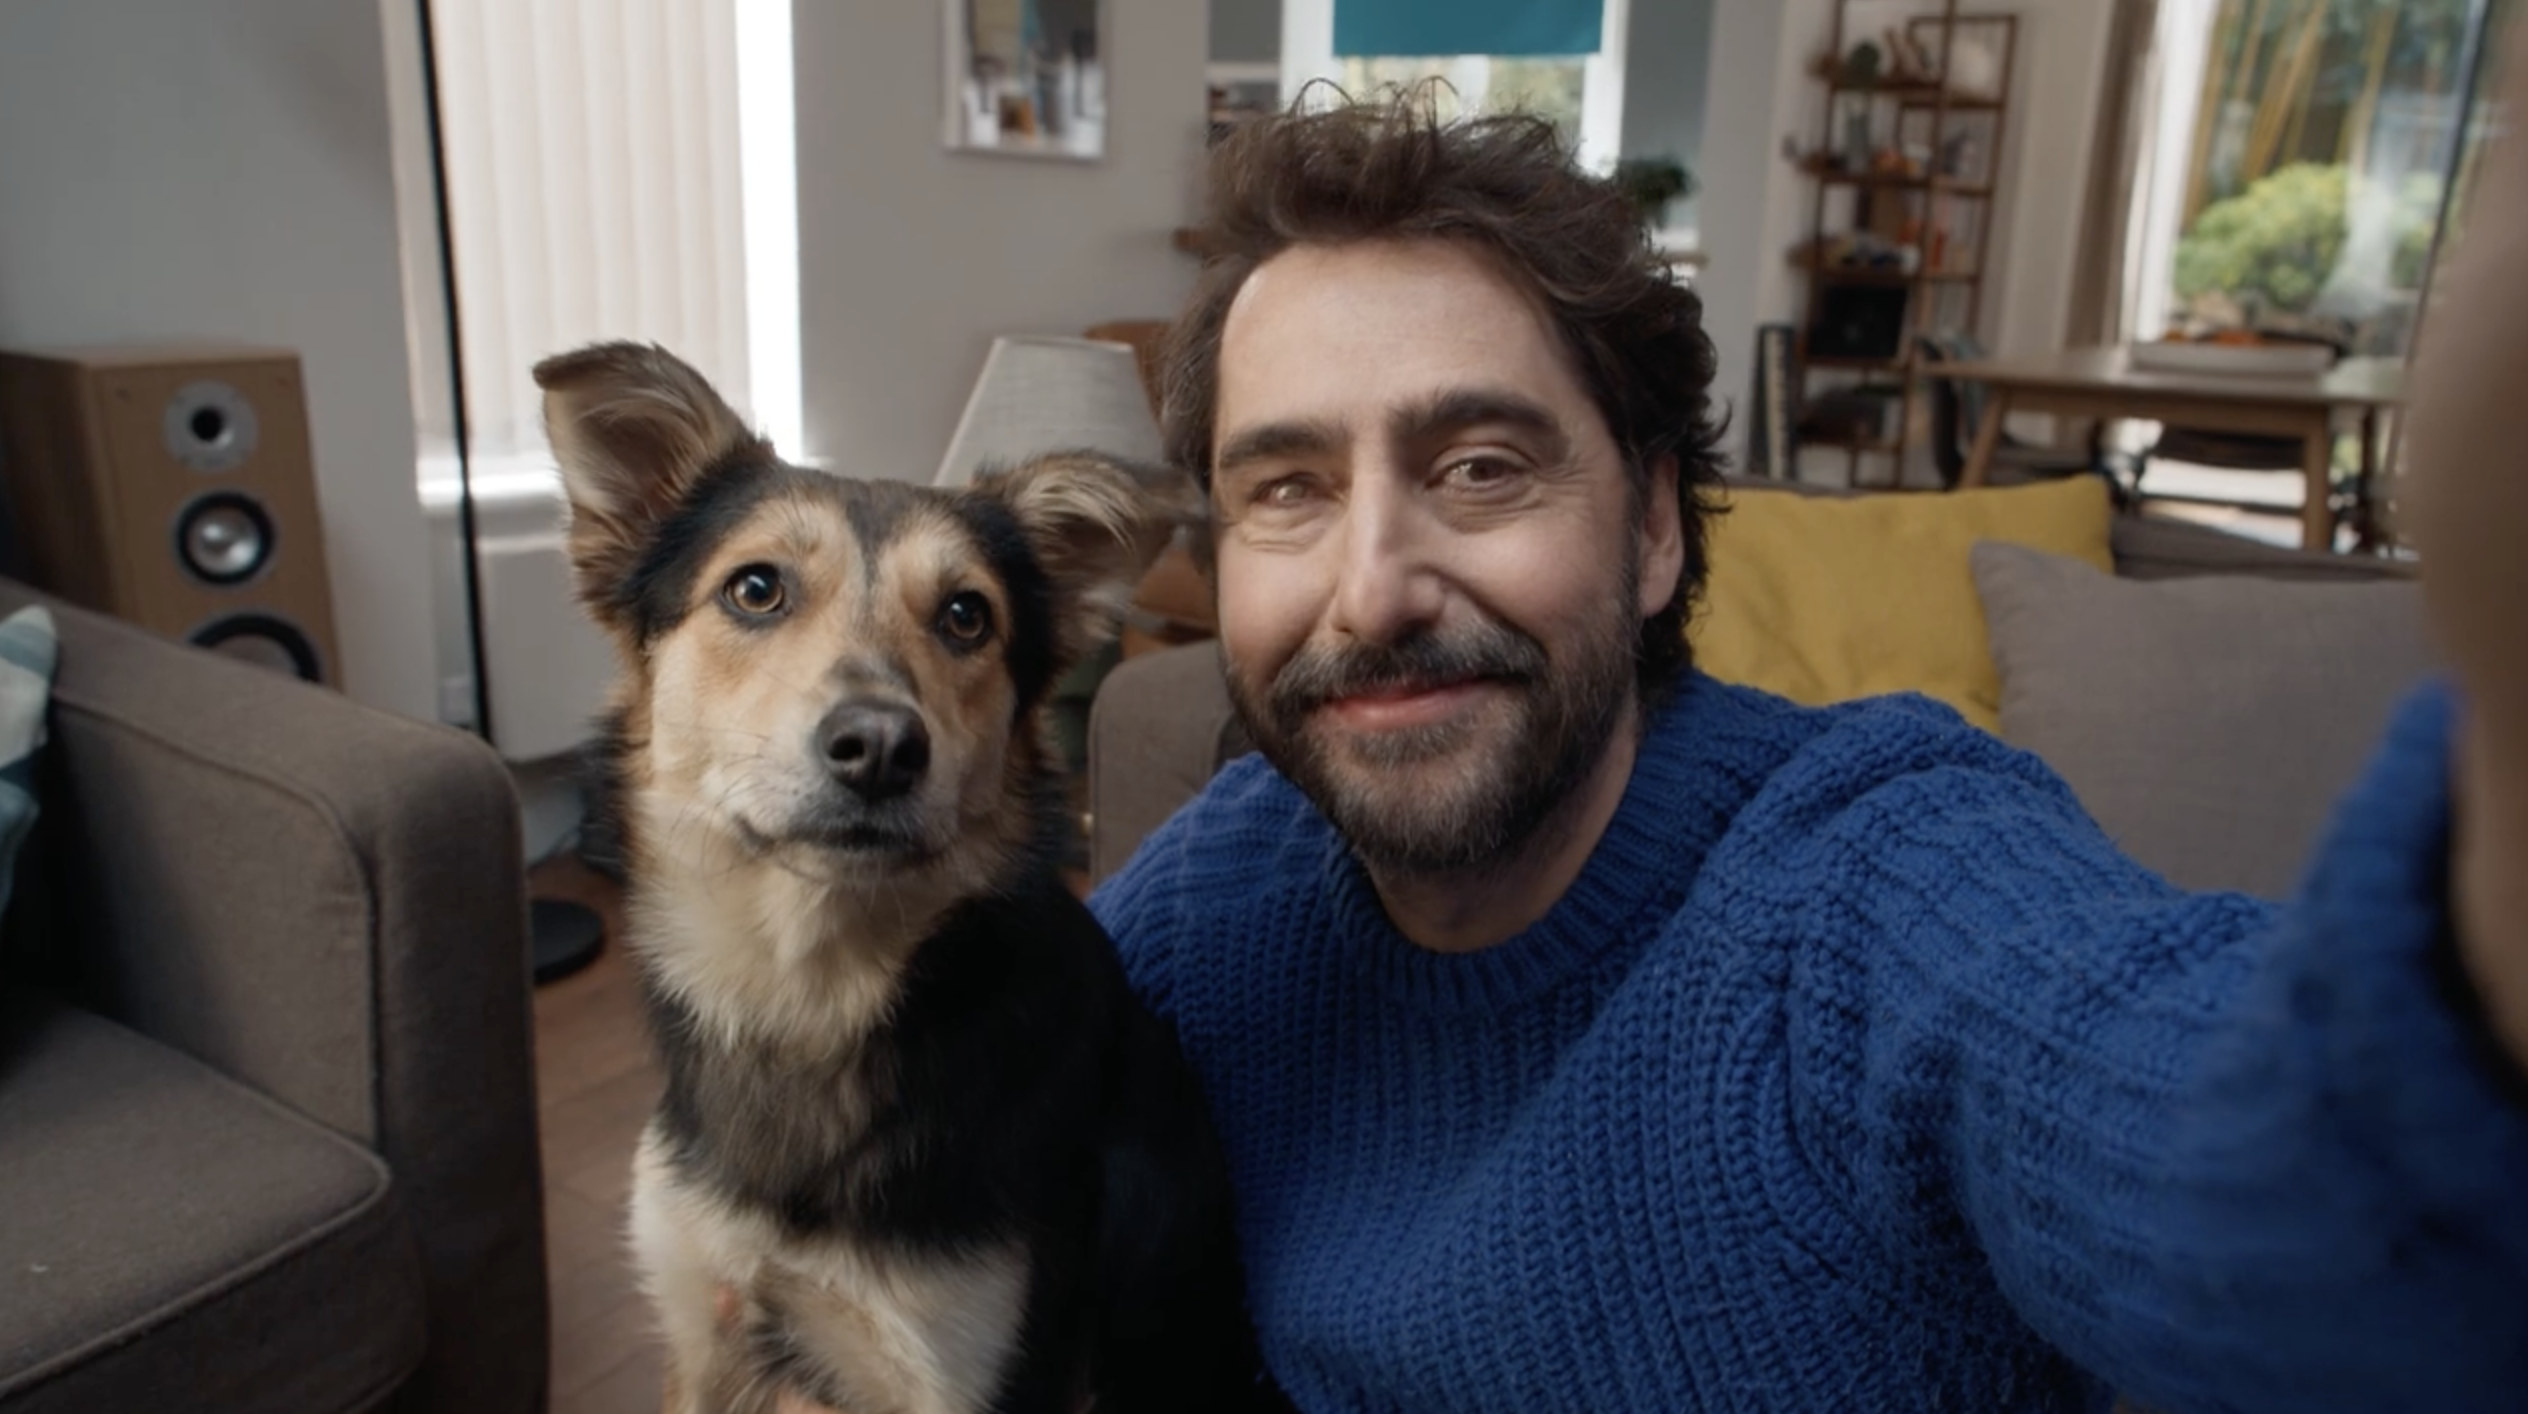

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}

In [27]:
# Download image for preview
! gsutil cp gs://cloud-samples-data/generative-ai/image/a-man-and-a-dog.png .
from IPython.display import Image, display
display(Image('a-man-and-a-dog.png'))

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Part(
            file_data=types.FileData(
                file_uri="gs://cloud-samples-data/generative-ai/image/a-man-and-a-dog.png",
                mime_type="image/jpeg",
            ),
            media_resolution=types.PartMediaResolution(
                level=types.PartMediaResolutionLevel.MEDIA_RESOLUTION_HIGH
            ),
        ),
        types.Part(
            file_data=types.FileData(
                file_uri="gs://cloud-samples-data/generative-ai/video/behind_the_scenes_pixel.mp4",
                mime_type="video/mp4",
            ),
            media_resolution=types.PartMediaResolution(
                level=types.PartMediaResolutionLevel.MEDIA_RESOLUTION_LOW
            ),
        ),
        "When does the image appear in the video? What is the context?",
    ],
)

display(Markdown(response.text))

Gemini 3 Flash supports an exclusive `ULTRA_HIGH` media resolution level for tasks requiring extreme visual detail.

In [28]:
# --- GEMINI 3 FLASH COMPARISON: ULTRA HIGH VISION ---
# Use Flash with ULTRA_HIGH resolution for fine-grained details

print(f"Analyzing image with {FLASH_MODEL_ID} (Media Resolution: ULTRA_HIGH)...")

response = client.models.generate_content(
    model=FLASH_MODEL_ID,
    contents=[
        types.Part(
            file_data=types.FileData(
                file_uri="gs://cloud-samples-data/generative-ai/image/a-man-and-a-dog.png",
                mime_type="image/jpeg",
            ),
            media_resolution=types.PartMediaResolution(
                level=types.PartMediaResolutionLevel.MEDIA_RESOLUTION_ULTRA_HIGH
            ),
        ),
        "Describe the texture of the dog's fur in extreme detail.",
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(thinking_level=types.ThinkingLevel.LOW)
    ),
)

display(Markdown(response.text))


Analyzing image with gemini-3-flash-preview (Media Resolution: ULTRA_HIGH)...


In this image, the dog's fur displays a complex variety of textures and patterns, reflecting its mixed-breed appearance.

*   **Overall Texture:** The coat appears to be a medium-length "double coat." The top layer consists of coarser, slightly wire-haired guard hairs that provide a textured, weather-resistant look, while a softer, denser undercoat is visible beneath, particularly around the neck and chest.
*   **Color Distribution:** 
    *   **The Muzzle and Face:** The fur around the snout is short, smooth, and primarily a warm tan or cream color. This transitions into a darker "mask" of black and deep brown around the eyes and bridge of the nose.
    *   **The "Eyebrows":** Distinct patches of tan fur sit above the eyes, where the hair is short and follows the curve of the brow bone.
    *   **The Ears:** The fur on the ears is particularly textural. The outer edges have fringe-like, wispy hairs that catch the light, while the interior of the ears shows softer, downy-looking fur in a lighter cream shade.
    *   **The Neck and Chest:** Here, the fur is significantly longer and more voluminous. It forms a "ruff" or mane where the hairs are thicker and appear to grow in multiple directions, creating a shaggy, soft appearance. The colors here are a blend of white, cream, and light tan.
    *   **The Back and Shoulders:** The fur transitions into a solid, dense black. These hairs appear flatter and more aligned than the shaggy neck fur, giving the back a sleeker, though still coarse, texture.
*   **Tactile Quality:** Visually, the fur looks well-maintained. It has a healthy, natural sheen rather than a greasy gloss. The individual strands are visible, especially where the light hits the side of the face, suggesting a mix of stiff guard hairs and soft, insulating fluff.

Or set it globally via `GenerateContentConfig`. If unspecified, the model uses optimal defaults based on the media type.

In [30]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Part(
            file_data=types.FileData(
                file_uri="gs://cloud-samples-data/generative-ai/image/a-man-and-a-dog.png",
                mime_type="image/jpeg",
            ),
        ),
        "What is in the image?",
    ],
    config=types.GenerateContentConfig(
        media_resolution=types.MediaResolution.MEDIA_RESOLUTION_LOW
    ),
)

display(Markdown(response.text))

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}

### ✅ Structured output

Structured output in Gemini 3, including the Pro and Flash models, ensures that responses align with a predefined format. This results in reliable, type-safe, and machine-readable data for various applications. 

#### 💡 [Pydantic](https://docs.pydantic.dev/latest/) Model Schema support

The Gemini 3 Pro model has deep integration with Pydantic, a Python library for data validation. This lets engineers use Python type hints to define the structured output and agent schemas the model follows. This ensures predictable, type-safe data for production systems

In [31]:
class CountryInfo(BaseModel):
    name: str
    population: int
    capital: str
    continent: str
    gdp: int
    official_language: str
    total_area_sq_mi: int


response = client.models.generate_content(
    model=MODEL_ID,
    contents="Give me information for the United States.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=CountryInfo,
    ),
)
# Response as JSON
display(Markdown(response.text))
# Response as Pydantic object
print(response.parsed)

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}

#### 💡 [OpenAPI Schema](https://swagger.io/specification/) support

Gemini 3 Pro offers native support for OpenAPI schemas. This allows engineers to define function calling interfaces using the industry-standard specification. It removes the need to write a custom boilerplate for every tool. It also ensures high compatibility with existing RESTful services and documentation 

In [32]:
response_schema = {
    "required": [
        "name",
        "population",
        "capital",
        "continent",
        "gdp",
        "official_language",
        "total_area_sq_mi",
    ],
    "properties": {
        "name": {"type": "STRING"},
        "population": {"type": "INTEGER"},
        "capital": {"type": "STRING"},
        "continent": {"type": "STRING"},
        "gdp": {"type": "INTEGER"},
        "official_language": {"type": "STRING"},
        "total_area_sq_mi": {"type": "INTEGER"},
    },
    "type": "OBJECT",
}

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Give me information for the United States.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=response_schema,
    ),
)
# As JSON
display(Markdown(response.text))
# As Dict
print(response.parsed)

{"name": "United States", "population": 334914895, "capital": "Washington, D.C.", "continent": "North America", "gdp": 27360000000000, "official_language": "None (English is de facto)", "total_area_sq_mi": 3796742}

{'name': 'United States', 'population': 334914895, 'capital': 'Washington, D.C.', 'continent': 'North America', 'gdp': 27360000000000, 'official_language': 'None (English is de facto)', 'total_area_sq_mi': 3796742}


### ✅ Grounding with Google Search

Gemini 3 Pro has a search-integrated tool designed for complex engineering tasks. It is not a standard chatbot. It combines a 1-million-token context window with real-time reasoning to solve multi-step problems using text, images, and video.


In [33]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Where will the next FIFA World Cup be held?",
    config=types.GenerateContentConfig(
        tools=[types.Tool(google_search=types.GoogleSearch())],
    ),
)

display(Markdown(response.text))
display(
    HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content)
)

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}

Return to the lab instructions to **Check your progress** to verify you ran the **Grounding with Google Search** section.

### ✅ Code execution

The code execution feature allows the model to generate, run, and correct Python code in a secure environment. This allows the model to check its own logic, learning from the results until it reaches a final output.

In [34]:
# Define code execution tool
code_execution_tool = types.Tool(code_execution=types.ToolCodeExecution())

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Calculate 20th fibonacci number. Then find the nearest palindrome to it.",
    config=types.GenerateContentConfig(
        tools=[code_execution_tool],
    ),
)

display(
    Markdown(
        f"""
## Code

```py
{response.executable_code}
```

### Output

```
{response.code_execution_result}
```
"""
    )
)

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}

Return to the lab instructions to **Check your progress** to verify you ran the **Code execution** section.

### ✅ URL context

The Gemini 3 Pro URL context tool lets engineers include URLs as input to the model's reasoning engine. This allows live or indexed web content to be passed directly into the model. This eliminates the need to manually copy and paste data for analysis. 

In [35]:
# Define the Url context tool
url_context_tool = types.Tool(url_context=types.UrlContext)

url = "https://blog.google/technology/developers/introducing-gemini-cli-open-source-ai-agent/"

response = client.models.generate_content(
    model=MODEL_ID,
    contents=f"Summarize this document: {url}",
    config=types.GenerateContentConfig(
        tools=[url_context_tool],
    ),
)

display(Markdown(response.text))
metadata = response.candidates[0].grounding_metadata

print(f"--- Grounding Verification ---\n")

# List sources first
print("Sources used:")
for i, chunk in enumerate(metadata.grounding_chunks):
    print(f"  [{i}]: {chunk.web.title} ({chunk.web.uri})")

print("\nSupport breakdown:")
for support in metadata.grounding_supports:
    indices = ", ".join(str(i) for i in support.grounding_chunk_indices)
    print(f"  • Text: \"{support.segment.text}\"")
    print(f"    -> Supported by source [{indices}]\n")


ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}

Return to the lab instructions to **Check your progress** to verify you ran the **URL context** section.

### ✅ Function calling

Function calling in Gemini 3 Pro enables the model to interact with external systems. It does this by outputting structured data instead of natural language. This feature is a core component of "agentic" workflows. It allows the model to perform real-world actions like querying databases, triggering API calls, or controlling local hardware. 


In [36]:
def get_weather(location: str):
    """Get the current weather in a specific location.

    Args:
        location: The city and state, e.g. San Francisco, CA or a zip code.
    """
    # This is a placeholder for a real API call.
    return {"temperature": "32", "unit": "celsius"}


response = client.models.generate_content(
    model=MODEL_ID,
    contents="What is the weather like in Toronto?",
    config=types.GenerateContentConfig(
        tools=[get_weather],
    ),
)

display(Markdown(response.text))

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}

Return to the lab instructions to **Check your progress** to verify you ran the **Function calling** section.

### ✅ Streaming function calling

Gemini 3 Pro allows you to stream partial function call arguments in real time. This improves the streaming experience on tool use. To enable this feature, set `stream_function_call_arguments` to true.

In [37]:
get_weather_declaration = types.FunctionDeclaration(
    name="get_weather",
    description="Gets the current weather temperature for a given location.",
    parameters={
        "type": "object",
        "properties": {"location": {"type": "string"}},
        "required": ["location"],
    },
)
get_weather_tool = types.Tool(function_declarations=[get_weather_declaration])


for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="What's the weather in London and New York?",
    config=types.GenerateContentConfig(
        tools=[get_weather_tool],
        tool_config=types.ToolConfig(
            function_calling_config=types.FunctionCallingConfig(
                mode=types.FunctionCallingConfigMode.AUTO,
                stream_function_call_arguments=True,
            )
        ),
    ),
):
    function_call = chunk.function_calls[0]
    if function_call and function_call.name:
        print(f"{function_call.name}")
        print(f"will_continue={function_call.will_continue}")

get_weather
will_continue=True
get_weather
will_continue=True


### ✅ Multimodal function responses

Multimodal function responses allow agents to process visual or document-based outputs from external tools. This enables a bidirectional multimodal loop. 

In [38]:
# 1. Define the function tool
get_image_declaration = types.FunctionDeclaration(
    name="get_image",
    description="Retrieves the image file reference for a specific order item.",
    parameters={
        "type": "object",
        "properties": {
            "item_name": {
                "type": "string",
                "description": "The name or description of the item ordered (e.g., 'green shirt').",
            }
        },
        "required": ["item_name"],
    },
)
tool_config = types.Tool(function_declarations=[get_image_declaration])

# 2. Send a message that triggers the tool
prompt = "Show me the green shirt I ordered last month."
response_1 = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt],
    config=types.GenerateContentConfig(
        tools=[tool_config],
    ),
)

# 3. Handle the function call
function_call = response_1.function_calls[0]
requested_item = function_call.args["item_name"]
print(f"Model wants to call: {function_call.name}")

# Execute your tool (e.g., call an API)
# (This is a mock response for the example)
print(f"Calling external tool for: {requested_item}")

function_response_data = {
    "image_ref": {"$ref": "dress.jpg"},
}

function_response_multimodal_data = types.FunctionResponsePart(
    file_data=types.FunctionResponseFileData(
        mime_type="image/png",
        display_name="dress.jpg",
        file_uri="gs://cloud-samples-data/generative-ai/image/dress.jpg",
    )
)

# 4. Send the tool's result back
# Append this turn's messages to history for a final response.
history = [
    types.Content(role="user", parts=[types.Part(text=prompt)]),
    response_1.candidates[0].content,
    types.Content(
        role="tool",
        parts=[
            types.Part.from_function_response(
                name=function_call.name,
                response=function_response_data,
                parts=[function_response_multimodal_data],
            )
        ],
    ),
]

response_2 = client.models.generate_content(
    model=MODEL_ID,
    contents=history,
    config=types.GenerateContentConfig(
        tools=[tool_config],
        thinking_config=types.ThinkingConfig(include_thoughts=True),
    ),
)

print(f"\nFinal model response: {response_2.text}")

Model wants to call: get_image
Calling external tool for: green shirt

Final model response: Here is the image of the green shirt you ordered last month.


### ✅ Thought signatures

[Thought signatures](https://docs.cloud.google.com/vertex-ai/generative-ai/docs/thinking#signatures) are encrypted tokens that preserve the model's reasoning state during multi-turn conversations, specifically when using Function Calling.

When a thinking model decides to call an external tool, it pauses its internal reasoning process. The thought signature acts as a "save state", allowing the model to resume its chain of thought seamlessly once you provide the function's result.

Gemini 3 Pro enforces stricter validation and updated handling on thought signatures which were originally introduced in Gemini 2.5. To ensure the model maintains context across multiple turns of a conversation, you must return the thought signatures in your subsequent requests.


#### Automatic Handling of Thought Signatures (Recommended)

If you are using the Google Gen AI SDKs (Python, Node.js, Go, Java) or OpenAI Chat Completions API, and utilizing the standard chat history features or appending the full model response, thought signatures are handled automatically. You do not need to make any changes to your code.


#### **Example 1**: Automatic function calling

When using the Gen AI SDK in automatic function calling, thought signatures are handled automatically.


In [39]:
def get_weather(city: str) -> str:
    """Gets the weather in a city."""
    if "london" in city.lower():
        return "Rainy"
    if "new york" in city.lower():
        return "Sunny"
    return "Cloudy"


response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the weather in London and New York?",
    config=types.GenerateContentConfig(
        tools=[get_weather],
    ),
)

# The SDK handles the function calls and thought signatures, and returns the final text
print("Final response:", response.text)

# Print function calling history
hist_turn = response.automatic_function_calling_history[1]
print("\nFunction Call 1:", hist_turn.parts[1].function_call.name)

Final response: The weather in London is Rainy, and the weather in New York is Sunny.

Function Call 1: get_weather


#### **Example 2**: Manual function calling

When using the Gen AI SDK in manual function calling, thought signatures are also handled automatically if you append the full model response in sequential model requests.

In [40]:
# 1. Define your tool
get_weather_declaration = types.FunctionDeclaration(
    name="get_weather",
    description="Gets the current weather temperature for a given location.",
    parameters={
        "type": "object",
        "properties": {"location": {"type": "string"}},
        "required": ["location"],
    },
)
get_weather_tool = types.Tool(function_declarations=[get_weather_declaration])

# 2. Send a message that triggers the tool
prompt = "What's the weather like in London?"
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[get_weather_tool],
        thinking_config=types.ThinkingConfig(include_thoughts=True),
    ),
)

# 3. Handle the function call
function_call = response.function_calls[0]
location = function_call.args["location"]
print(f"Model wants to call: {function_call.name}")

# Execute your tool (e.g., call an API)
# (This is a mock response for the example)
print(f"Calling external tool for: {location}")
function_response_data = {
    "location": location,
    "temperature": "30C",
}

# 4. Send the tool's result back
# Append this turn's messages to history for a final response.
# The `content` object automatically attaches the required thought_signature behind the scenes.
history = [
    types.Content(role="user", parts=[types.Part(text=prompt)]),
    response.candidates[0].content,  # Signature preserved here
    types.Content(
        role="tool",
        parts=[
            types.Part.from_function_response(
                name=function_call.name,
                response=function_response_data,
            )
        ],
    ),
]

response_2 = client.models.generate_content(
    model=MODEL_ID,
    contents=history,
    config=types.GenerateContentConfig(
        tools=[get_weather_tool],
        thinking_config=types.ThinkingConfig(include_thoughts=True),
    ),
)

# 5. Get the final, natural-language answer
print(f"\nFinal model response: {response_2.text}")

Model wants to call: get_weather
Calling external tool for: London

Final model response: The weather in London is currently 30°C.


#### Manual handling of thought signatures

If you are interacting with the API directly or managing raw JSON payloads, you must correctly handle the `thought_signature` included in the model's turn.
You must return this signature in the exact part where it was received when sending the conversation history back.

⚠️ If proper signatures are not returned, the model will return a 400 Error `"Function Call in the content block is missing a thought_signature"`.

See [documentation](https://docs.cloud.google.com/vertex-ai/generative-ai/docs/multimodal/function-calling#thinking) for more details.

### ✅ Count tokens and compute tokens

Count tokens is a tool to manage costs and stay within the model's 1-million-token context window. This tool provides a precise count of the billing units used by different data types. These include text, code, high-resolution images, and video.

In [41]:
# Count tokens
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="why is the sky blue?",
)

print(response)

sdk_http_response=HttpResponse(
  headers=<dict len=9>
) total_tokens=6 cached_content_token_count=None


In [42]:
# Compute tokens
response = client.models.compute_tokens(
    model=MODEL_ID,
    contents="why is the sky blue?",
)

print(response)

sdk_http_response=HttpResponse(
  headers=<dict len=9>
) tokens_info=[TokensInfo(
  role='user',
  token_ids=[
    36425,
    563,
    506,
    7217,
    3730,
    <... 1 more items ...>,
  ],
  tokens=[
    b'why',
    b' is',
    b' the',
    b' sky',
    b' blue',
    <... 1 more items ...>,
  ]
)]


Return to the lab instructions to **Check your progress** to verify you ran the **Count tokens and compute tokens** section of the lab.